## Project Objective

#### The goal of this project is to predict the prices of travel packages of india listed on the TravelTriangle website using machine learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv(r"C:\Users\INNOMATICS TASKS AND ASSIGNMENTS\webscraping project\travel_triangle.csv")

In [3]:
data.head()

,Package Name,Price,Duration,Discount,City,Tags
0,Most Reasonable Goa Honeymoon Tour Packages,7999,5Days &4Nights,13% Off,Goa (5D),"Hot Pick, Water Activities, Romantic Cruise, A..."
1,Fantastic Andaman Honeymoon Package,15599,5Days &4Nights,17% Off,Port Blair (3D),"Corbyn's Beach Cove, Adventure, Radhanagar Bea..."
2,Romantic Mussoorie Tour Package From Delhi,10500,3Days &2Nights,13% Off,Havelock (2D),"Sightseeing, Nature, Hill station, Himalayas, ..."
3,Coorg Package For 2 Nights And 3 Days,14500,3Days &2Nights,9% Off,Mussoorie (3D),"Coorg sightseeing, Adventure, Raja’s Seat, Nat..."
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,33200,5Days &4Nights,9% Off,Coorg (3D),"Cellular Jail, Light & Sound Show, Adventure, ..."


In [4]:
data.shape

(900, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Package Name  900 non-null    object
 1   Price         900 non-null    int64 
 2   Duration      900 non-null    object
 3   Discount      900 non-null    object
 4   City          900 non-null    object
 5   Tags          900 non-null    object
dtypes: int64(1), object(5)
memory usage: 42.3+ KB


#### Data Cleaning

##### Removing unwanted symbols and converting datatypes

In [6]:
data['Discount'] = data['Discount'].str.replace('% Off', '').astype(int)

##### Extracting  numeric values from Duration (e.g. "5Days &4Nights")

In [7]:
import re
data['Days'] = data['Duration'].apply(lambda x: int(re.findall(r'(\d+)Days', x)[0]) if pd.notnull(x) else 0)
data['Nights'] = data['Duration'].apply(lambda x: int(re.findall(r'(\d+)Nights', x)[0]) if pd.notnull(x) else 0)


In [8]:
data.drop('Duration', axis=1, inplace=True)

In [9]:
data.head()

,Package Name,Price,Discount,City,Tags,Days,Nights
0,Most Reasonable Goa Honeymoon Tour Packages,7999,13,Goa (5D),"Hot Pick, Water Activities, Romantic Cruise, A...",5,4
1,Fantastic Andaman Honeymoon Package,15599,17,Port Blair (3D),"Corbyn's Beach Cove, Adventure, Radhanagar Bea...",5,4
2,Romantic Mussoorie Tour Package From Delhi,10500,13,Havelock (2D),"Sightseeing, Nature, Hill station, Himalayas, ...",3,2
3,Coorg Package For 2 Nights And 3 Days,14500,9,Mussoorie (3D),"Coorg sightseeing, Adventure, Raja’s Seat, Nat...",3,2
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,33200,9,Coorg (3D),"Cellular Jail, Light & Sound Show, Adventure, ...",5,4


##### Handling Missing Values

In [10]:
data.fillna({'Discount': data['Discount'].mean()}, inplace=True)
data.dropna(inplace=True)

In [11]:
data

,Package Name,Price,Discount,City,Tags,Days,Nights
0,Most Reasonable Goa Honeymoon Tour Packages,7999,13,Goa (5D),"Hot Pick, Water Activities, Romantic Cruise, A...",5,4
1,Fantastic Andaman Honeymoon Package,15599,17,Port Blair (3D),"Corbyn's Beach Cove, Adventure, Radhanagar Bea...",5,4
2,Romantic Mussoorie Tour Package From Delhi,10500,13,Havelock (2D),"Sightseeing, Nature, Hill station, Himalayas, ...",3,2
3,Coorg Package For 2 Nights And 3 Days,14500,9,Mussoorie (3D),"Coorg sightseeing, Adventure, Raja’s Seat, Nat...",3,2
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,33200,9,Coorg (3D),"Cellular Jail, Light & Sound Show, Adventure, ...",5,4
...,...,...,...,...,...,...,...
895,Dwarka Tour Package.,15599,9,Coorg (3D),"Sightseeing, Religious, Religious Tour, Histor...",3,2
896,Spectacular Goa Family Tour Package,13799,9,Ooty (2D),"North Goa Beaches, Water Activities, South Goa...",4,3
897,Magnificent Himachal Tour Package,34500,9,Ranthambore (3D),"Sightseeing, Temple, Hill station, Churches, R...",10,9
898,Fun Filled Leh Ladakh Family Tour Package,26999,21,Manali (5D),"Family Tour, Road Trip, Adventure, Nature, Hil...",6,5


#### Exploratory Data Analysis

In [12]:
from wordcloud import WordCloud


In [13]:
print("\n Basic Dataset Overview:")
print(data.describe(include='all'))
print("\nUnique Cities:", data['City'].nunique())


 Basic Dataset Overview:
                                       Package Name          Price  \
count                                           900     900.000000   
unique                                          900            NaN   
top     Most Reasonable Goa Honeymoon Tour Packages            NaN   
freq                                              1            NaN   
mean                                            NaN   20449.136667   
std                                             NaN   14875.167335   
min                                             NaN    2199.000000   
25%                                             NaN   11476.000000   
50%                                             NaN   15999.500000   
75%                                             NaN   25000.000000   
max                                             NaN  168000.000000   

          Discount         City                            Tags        Days  \
count   900.000000          900                       

In [14]:
# Check for actual missing or blank values
data.isnull().sum()

# Also check for blank strings (common in scraped data)
data.replace('', np.nan, inplace=True)
data.isnull().sum()


Package Name    0
Price           0
Discount        0
City            0
Tags            0
Days            0
Nights          0
dtype: int64

In [15]:
data.head()

,Package Name,Price,Discount,City,Tags,Days,Nights
0,Most Reasonable Goa Honeymoon Tour Packages,7999,13,Goa (5D),"Hot Pick, Water Activities, Romantic Cruise, A...",5,4
1,Fantastic Andaman Honeymoon Package,15599,17,Port Blair (3D),"Corbyn's Beach Cove, Adventure, Radhanagar Bea...",5,4
2,Romantic Mussoorie Tour Package From Delhi,10500,13,Havelock (2D),"Sightseeing, Nature, Hill station, Himalayas, ...",3,2
3,Coorg Package For 2 Nights And 3 Days,14500,9,Mussoorie (3D),"Coorg sightseeing, Adventure, Raja’s Seat, Nat...",3,2
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,33200,9,Coorg (3D),"Cellular Jail, Light & Sound Show, Adventure, ...",5,4


In [16]:
import re

# Make a copy to avoid changing original data
data = data.copy()

#  Extract destination names (before keywords like 'Package' or 'Tour')
data['Destination'] = data['Package Name'].apply(
    lambda x: re.findall(r'([A-Za-z]+)\s+(?:Tour|Package)', x)
)
# Take the first matched destination if multiple found
data['Destination'] = data['Destination'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')

#  Extract package type keywords (e.g., Honeymoon, Adventure, Family)
package_types = ['Honeymoon', 'Adventure', 'Sightseeing', 'Family', 'Romantic', 'Holiday', 'Luxury', 'Budget']
def get_package_type(name):
    for word in package_types:
        if word.lower() in name.lower():
            return word
    return 'Other'

data['Package_Type'] = data['Package Name'].apply(get_package_type)

#  Optional: extract sentiment words like 'Best', 'Fantastic', 'Affordable'
data['Has_Positive_Word'] = data['Package Name'].apply(
    lambda x: 1 if re.search(r'\b(Best|Fantastic|Amazing|Affordable|Reasonable|Popular)\b', x, re.I) else 0
)

# View extracted info
data[['Package Name', 'Destination', 'Package_Type', 'Has_Positive_Word']].head()


,Package Name,Destination,Package_Type,Has_Positive_Word
0,Most Reasonable Goa Honeymoon Tour Packages,Honeymoon,Honeymoon,1
1,Fantastic Andaman Honeymoon Package,Honeymoon,Honeymoon,1
2,Romantic Mussoorie Tour Package From Delhi,Mussoorie,Romantic,0
3,Coorg Package For 2 Nights And 3 Days,Coorg,Other,0
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,Sightseeing,Sightseeing,1


In [17]:
data.head()

,Package Name,Price,Discount,City,Tags,Days,Nights,Destination,Package_Type,Has_Positive_Word
0,Most Reasonable Goa Honeymoon Tour Packages,7999,13,Goa (5D),"Hot Pick, Water Activities, Romantic Cruise, A...",5,4,Honeymoon,Honeymoon,1
1,Fantastic Andaman Honeymoon Package,15599,17,Port Blair (3D),"Corbyn's Beach Cove, Adventure, Radhanagar Bea...",5,4,Honeymoon,Honeymoon,1
2,Romantic Mussoorie Tour Package From Delhi,10500,13,Havelock (2D),"Sightseeing, Nature, Hill station, Himalayas, ...",3,2,Mussoorie,Romantic,0
3,Coorg Package For 2 Nights And 3 Days,14500,9,Mussoorie (3D),"Coorg sightseeing, Adventure, Raja’s Seat, Nat...",3,2,Coorg,Other,0
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,33200,9,Coorg (3D),"Cellular Jail, Light & Sound Show, Adventure, ...",5,4,Sightseeing,Sightseeing,1


In [18]:
# List of key travel themes to look for in Tags
themes = ['Adventure', 'Sightseeing', 'Nature', 'Beach', 'Romantic', 
          'Luxury', 'Wildlife', 'Hill', 'Historical', 'Water', 'Cultural', 'Trekking']

# Create one binary column for each theme
for theme in themes:
    data[theme] = data['Tags'].str.contains(theme, case=False, na=False).astype(int)

# Optional: count how many tags each package has
data['Tag_Count'] = data['Tags'].apply(lambda x: len(str(x).split(',')))

# Display first few rows
data.head()


,Package Name,Price,Discount,City,Tags,Days,Nights,Destination,Package_Type,Has_Positive_Word,...,Beach,Romantic,Luxury,Wildlife,Hill,Historical,Water,Cultural,Trekking,Tag_Count
0,Most Reasonable Goa Honeymoon Tour Packages,7999,13,Goa (5D),"Hot Pick, Water Activities, Romantic Cruise, A...",5,4,Honeymoon,Honeymoon,1,...,1,1,0,0,0,0,1,0,0,10
1,Fantastic Andaman Honeymoon Package,15599,17,Port Blair (3D),"Corbyn's Beach Cove, Adventure, Radhanagar Bea...",5,4,Honeymoon,Honeymoon,1,...,1,1,0,0,0,1,1,0,0,12
2,Romantic Mussoorie Tour Package From Delhi,10500,13,Havelock (2D),"Sightseeing, Nature, Hill station, Himalayas, ...",3,2,Mussoorie,Romantic,0,...,0,1,0,0,1,0,0,0,0,7
3,Coorg Package For 2 Nights And 3 Days,14500,9,Mussoorie (3D),"Coorg sightseeing, Adventure, Raja’s Seat, Nat...",3,2,Coorg,Other,0,...,0,0,0,0,1,0,1,0,0,10
4,Best 4N 5D Andaman Sightseeing Tour Package Fo...,33200,9,Coorg (3D),"Cellular Jail, Light & Sound Show, Adventure, ...",5,4,Sightseeing,Sightseeing,1,...,0,0,0,0,1,0,1,0,0,9


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Package Name       900 non-null    object
 1   Price              900 non-null    int64 
 2   Discount           900 non-null    int32 
 3   City               900 non-null    object
 4   Tags               900 non-null    object
 5   Days               900 non-null    int64 
 6   Nights             900 non-null    int64 
 7   Destination        900 non-null    object
 8   Package_Type       900 non-null    object
 9   Has_Positive_Word  900 non-null    int64 
 10  Adventure          900 non-null    int32 
 11  Sightseeing        900 non-null    int32 
 12  Nature             900 non-null    int32 
 13  Beach              900 non-null    int32 
 14  Romantic           900 non-null    int32 
 15  Luxury             900 non-null    int32 
 16  Wildlife           900 non-null    int32 
 1

In [20]:
# Drop unnecessary columns
data = data.drop(['Package Name', 'Tags', 'Tag_Count'], axis=1)

# Verify the change
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Price              900 non-null    int64 
 1   Discount           900 non-null    int32 
 2   City               900 non-null    object
 3   Days               900 non-null    int64 
 4   Nights             900 non-null    int64 
 5   Destination        900 non-null    object
 6   Package_Type       900 non-null    object
 7   Has_Positive_Word  900 non-null    int64 
 8   Adventure          900 non-null    int32 
 9   Sightseeing        900 non-null    int32 
 10  Nature             900 non-null    int32 
 11  Beach              900 non-null    int32 
 12  Romantic           900 non-null    int32 
 13  Luxury             900 non-null    int32 
 14  Wildlife           900 non-null    int32 
 15  Hill               900 non-null    int32 
 16  Historical         900 non-null    int32 
 1

In [21]:
data.head()

,Price,Discount,City,Days,Nights,Destination,Package_Type,Has_Positive_Word,Adventure,Sightseeing,Nature,Beach,Romantic,Luxury,Wildlife,Hill,Historical,Water,Cultural,Trekking
0,7999,13,Goa (5D),5,4,Honeymoon,Honeymoon,1,1,0,1,1,1,0,0,0,0,1,0,0
1,15599,17,Port Blair (3D),5,4,Honeymoon,Honeymoon,1,1,1,1,1,1,0,0,0,1,1,0,0
2,10500,13,Havelock (2D),3,2,Mussoorie,Romantic,0,0,1,1,0,1,0,0,1,0,0,0,0
3,14500,9,Mussoorie (3D),3,2,Coorg,Other,0,1,1,1,0,0,0,0,1,0,1,0,0
4,33200,9,Coorg (3D),5,4,Sightseeing,Sightseeing,1,1,1,1,0,0,0,0,1,0,1,0,0


In [22]:
data['City'] = data['City'].str.replace(r'\s*\(\d+D\)', '', regex=True).str.strip()

# Check cleaned values
data['City'].unique()[:10]

array(['Goa', 'Port Blair', 'Havelock', 'Mussoorie', 'Coorg', 'Manali',
       'Munnar', 'Thekkady', 'Alleppey', 'Kochi'], dtype=object)

In [23]:
data.head()

,Price,Discount,City,Days,Nights,Destination,Package_Type,Has_Positive_Word,Adventure,Sightseeing,Nature,Beach,Romantic,Luxury,Wildlife,Hill,Historical,Water,Cultural,Trekking
0,7999,13,Goa,5,4,Honeymoon,Honeymoon,1,1,0,1,1,1,0,0,0,0,1,0,0
1,15599,17,Port Blair,5,4,Honeymoon,Honeymoon,1,1,1,1,1,1,0,0,0,1,1,0,0
2,10500,13,Havelock,3,2,Mussoorie,Romantic,0,0,1,1,0,1,0,0,1,0,0,0,0
3,14500,9,Mussoorie,3,2,Coorg,Other,0,1,1,1,0,0,0,0,1,0,1,0,0
4,33200,9,Coorg,5,4,Sightseeing,Sightseeing,1,1,1,1,0,0,0,0,1,0,1,0,0


#### Price Distribution using Histogram

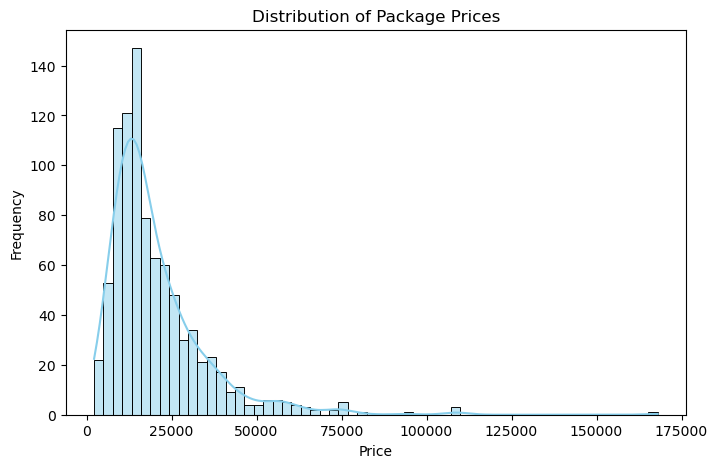

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], kde=True, color='skyblue')
plt.title('Distribution of Package Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


#### Interpretation : 
##### The distribution of travel package prices is right-skewed, meaning most packages are low to moderately priced (₹5,000–₹30,000), while a 

##### few are high-priced outliers. This indicates the dataset is dominated by budget or mid-range travel options, with a small number of 

##### premium packages. The skewness suggests that a log transformation of Price may help improve model performance in regression.

#### Relationship Between Duration and Price to check if longer trips are more expensive using Scatter plot

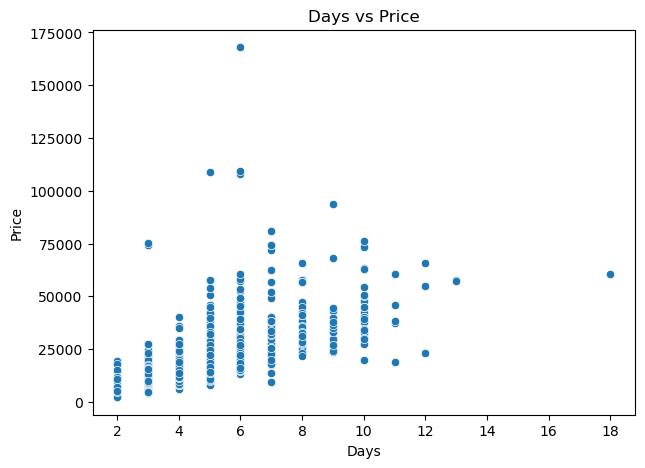

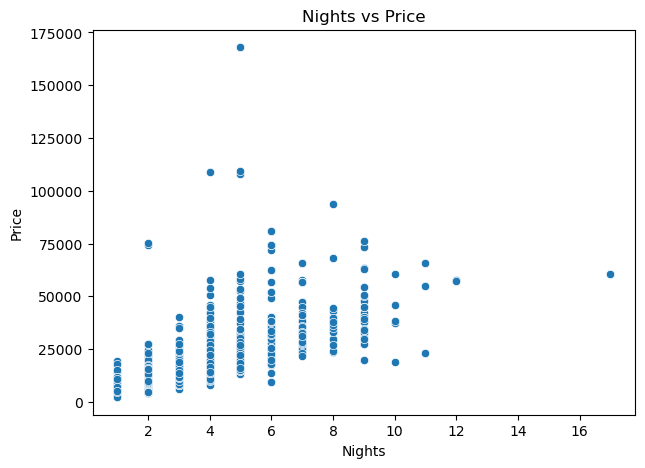

In [25]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Days', y='Price', data=data)
plt.title('Days vs Price')
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='Nights', y='Price', data=data)
plt.title('Nights vs Price')
plt.show()


#### Interpretation:
##### The scatter plots show a positive relationship between the number of days/nights and the price of tour packages. As the duration 

##### increases, prices generally tend to rise, though the correlation is not perfectly linear. Some shorter trips are also priced high, 

##### indicating that destination, accommodation type, or package inclusions may also influence pricing.

##### In short: Longer trips are generally more expensive, but other factors also affect the total price.

### Average Price by Destination using Barplot



##### Using Barplot to find which destinations in india are more costly?

In [26]:
avg_price = df.groupby('City')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(28,18))  # Larger figure for clarity
sns.barplot(x=avg_price.index, y=avg_price.values, palette='viridis')

plt.title('Average Price by Destination', fontsize=14, fontweight='bold')
plt.xlabel('Destination', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(rotation=95, ha='right')  # Rotate for readability
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

#### Interpretation:

##### The chart shows that destinations like **Goa, Andaman, and Leh** have the **highest average travel package prices**, indicating they are premium or high-demand tourist spots. In contrast, destinations such as **Chandigarh and Mathura** have **lower average prices**, suggesting they are more affordable or attract shorter, budget-friendly trips. Overall, **popular beach and island destinations tend to be more costly** than hill stations or cultural locations.


### Average Price by Package Type



#### To Understand how the type of trip (Honeymoon, Sightseeing, etc.) affects price.

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Package_Type', y='Price', data=data, palette='pastel')
plt.title('Price Variation by Package Type')
plt.xlabel('Package Type')
plt.ylabel('Price')
plt.show()


### Interpretation:

##### The boxplot shows that **Honeymoon and Family packages** generally have **higher median prices**, indicating they are more premium options. **Romantic, Adventure, and Sightseeing packages** are moderately priced, while **Budget and Holiday packages** are the most affordable. The **Luxury category** has consistently high prices with no variation, suggesting limited but expensive offerings. Overall, prices vary widely across types, with several outliers indicating premium, high-cost packages.



### Correlation Heatmap

#### To find which features (Days, Nights, tags, etc.) most strongly influence Price.

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


### Tag Impact on Price

#### Which activities or tags increase package cost?

In [ ]:
tag_columns = ['Adventure', 'Sightseeing', 'Nature', 'Beach', 'Romantic',
               'Luxury', 'Wildlife', 'Hill', 'Historical', 'Water', 
               'Cultural', 'Trekking']

avg_tag_price = {tag: data[data[tag]==1]['Price'].mean() for tag in tag_columns}

plt.figure(figsize=(10,4))
sns.barplot(x=list(avg_tag_price.keys()), y=list(avg_tag_price.values()), palette='mako')
plt.title('Average Price by Tag Type')
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.show()


### Interpretations:

#### The chart shows that **Luxury packages** have the highest average price, indicating they are premium offerings. **Trekking, Hill, and 

#### Romantic** packages are also relatively expensive. In contrast, **Beach, Wildlife, and Historical** packages tend to be more budget-

#### friendly. Overall, the cost of packages varies notably by tag type, reflecting differences in experience quality and amenities.


In [ ]:
data.head()

In [ ]:
data.info()

In [29]:
# Step 6 - Define features and target
num_features = ['Days', 'Nights', 'Discount', 'Has_Positive_Word']
cat_features = ['Destination', 'Package_Type', 'City']
tag_cols = ['Adventure','Sightseeing','Nature','Beach','Romantic','Luxury',
            'Wildlife','Hill','Historical','Water','Cultural','Trekking']

X = data[num_features + cat_features + tag_cols]
y = data['Price']

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (900, 19)
y shape: (900,)


### Train - Test - Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [32]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
], remainder='passthrough')


### Model Training and Evaluation

In [33]:
# =====================================
#  Import Required Libraries
# =====================================
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =====================================
# ⚙️ Model Evaluation Function
# =====================================
def eval_model(model, name):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"{name}: MAE={mae:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")
    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

# =====================================
#  Define Models
# =====================================
models = {
    'Linear Regression': Pipeline([
        ('pre', preprocessor),
        ('model', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('pre', preprocessor),
        ('model', RandomForestRegressor(random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('pre', preprocessor),
        ('model', GradientBoostingRegressor(random_state=42))
    ]),
    'XGBoost': Pipeline([
        ('pre', preprocessor),
        ('model', XGBRegressor(objective='reg:squarederror', random_state=42))
    ])
}

# =====================================
#  Evaluate All Models
# =====================================
results = [eval_model(pipe, name) for name, pipe in models.items()]
results_df = pd.DataFrame(results)

# =====================================
#  Display Results
# =====================================
print("\nModel Performance Summary:")
display(results_df.sort_values(by="R2", ascending=False))


Linear Regression: MAE=7328.09, RMSE=11073.70, R²=0.4203
Random Forest: MAE=6245.81, RMSE=10104.62, R²=0.5174
Gradient Boosting: MAE=5965.42, RMSE=9583.47, R²=0.5659
XGBoost: MAE=6318.62, RMSE=10432.24, R²=0.4856

Model Performance Summary:


,Model,MAE,RMSE,R2
2,Gradient Boosting,5965.416016,9583.465090,0.565862
1,Random Forest,6245.813639,10104.615039,0.517361
3,XGBoost,6318.624824,10432.244396,0.485555
0,Linear Regression,7328.092934,11073.700307,0.420346


### Hyper parameter Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Gradient Boosting
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 4, 5],
    'model__subsample': [0.8, 1.0]
}

# Pipeline already includes preprocessor
gb_pipeline = Pipeline([
    ('pre', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Grid Search CV
grid_search = GridSearchCV(
    gb_pipeline, param_grid,
    cv=5, scoring='r2', n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 1.0}
Best R² Score: 0.4406569376185251


In [35]:
# Train final model using best parameters
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

final_model = Pipeline([
    ('pre', preprocessor),
    ('model', best_gb_model)
])

final_model.fit(X_train, y_train)


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Days', 'Nights', 'Discount',
                                                   'Has_Positive_Word']),
                                                 ('cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Destination',
                                                   'Package_Type', 'City'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=200,
                                           random_state=42))])



### Interpretation of the Pipeline:

##### num → StandardScaler: All numerical features are standardized (mean = 0, std = 1).

##### cat → OneHotEncoder: All categorical features are converted into binary columns.

##### remainder → passthrough: Any unused columns are kept as-is.

##### GradientBoostingRegressor: Your final tuned model uses the optimal parameters found during grid search.

### Model Evaluation on Test data

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test data
y_pred = final_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(" Final Model Evaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


 Final Model Evaluation on Test Set:
MAE: 5903.51
RMSE: 9442.50
R² Score: 0.5785


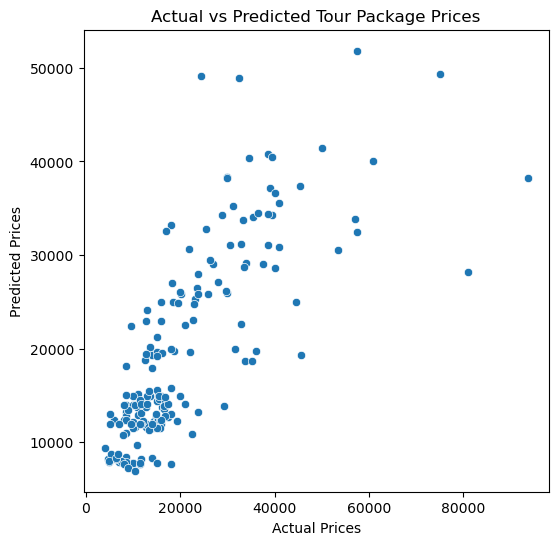

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Tour Package Prices")
plt.show()


### Interpretation:

#### Positive Trend (Upward Diagonal Shape):

##### The points generally form a diagonal trend from the bottom-left to top-right.

##### This means that as actual prices increase, predicted prices also increase — your model correctly captures the general relationship.

##### Perfect Prediction Line (y = x):

##### Ideally, all points should lie exactly on a 45° diagonal line, where Predicted = Actual.

##### In the plot, most points are close to this line but not exactly on it — showing some prediction error.

#### Clusters at Lower Price Ranges:

##### There’s a visible cluster of points around ₹5,000–₹20,000, meaning most packages fall in that price range.

##### The model performs better there since the points are tightly packed near the diagonal.

#### Wider Spread at Higher Prices:

##### As the prices increase (₹40,000+), the spread widens — predictions deviate more from actual values.

##### This shows that the model has higher error for expensive tour packages, possibly due to fewer data points in that range.

### Final Conclusion
##### The model captures the overall trend of package pricing quite well.

#####  However, it underestimates or overestimates some of the higher-priced packages, which explains why the R² = 0.58 — good, but not perfect.

##### To improve further:

##### Add more high-value data points (better balance).

##### Try non-linear or boosting models (like XGBoost, CatBoost).

##### Engineer features like season, duration, or destination popularity.

### Model Saving for deployment

In [39]:
import joblib
joblib.dump(final_model, "best_gradient_boosting_model.pkl")
print(" Model saved successfully!")


 Model saved successfully!
